In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.1/78.2 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet




from roboflow import Roboflow
rf = Roboflow(api_key="*******")
project = rf.workspace("******").project("catch_me_if_you_can")
dataset = project.version(3).download("yolov8")


mkdir: cannot create directory ‘/content/catch_me_if_you_can-2/datasets’: File exists
/content/catch_me_if_you_can-2/datasets
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to catch_me_if_you_can-3 in yolov8:: 100%|██████████| 380/380 [00:00<00:00, 2441.88it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=40 imgsz=800 plots=True

/content/catch_me_if_you_can-2
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/catch_me_if_you_can-2/datasets/catch_me_if_you_can-3/data.yaml, epochs=40, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [ ]:
!ls {HOME}/runs/detect/train4/

args.yaml					     train_batch0.jpg
confusion_matrix.png				     train_batch1.jpg
events.out.tfevents.1687707722.41f0e6b9069c.31491.0  train_batch2.jpg
F1_curve.png					     train_batch300.jpg
P_curve.png					     train_batch301.jpg
PR_curve.png					     train_batch302.jpg
R_curve.png					     val_batch0_labels.jpg
results.csv					     val_batch0_pred.jpg
results.png					     weights


/content/catch_me_if_you_can-2


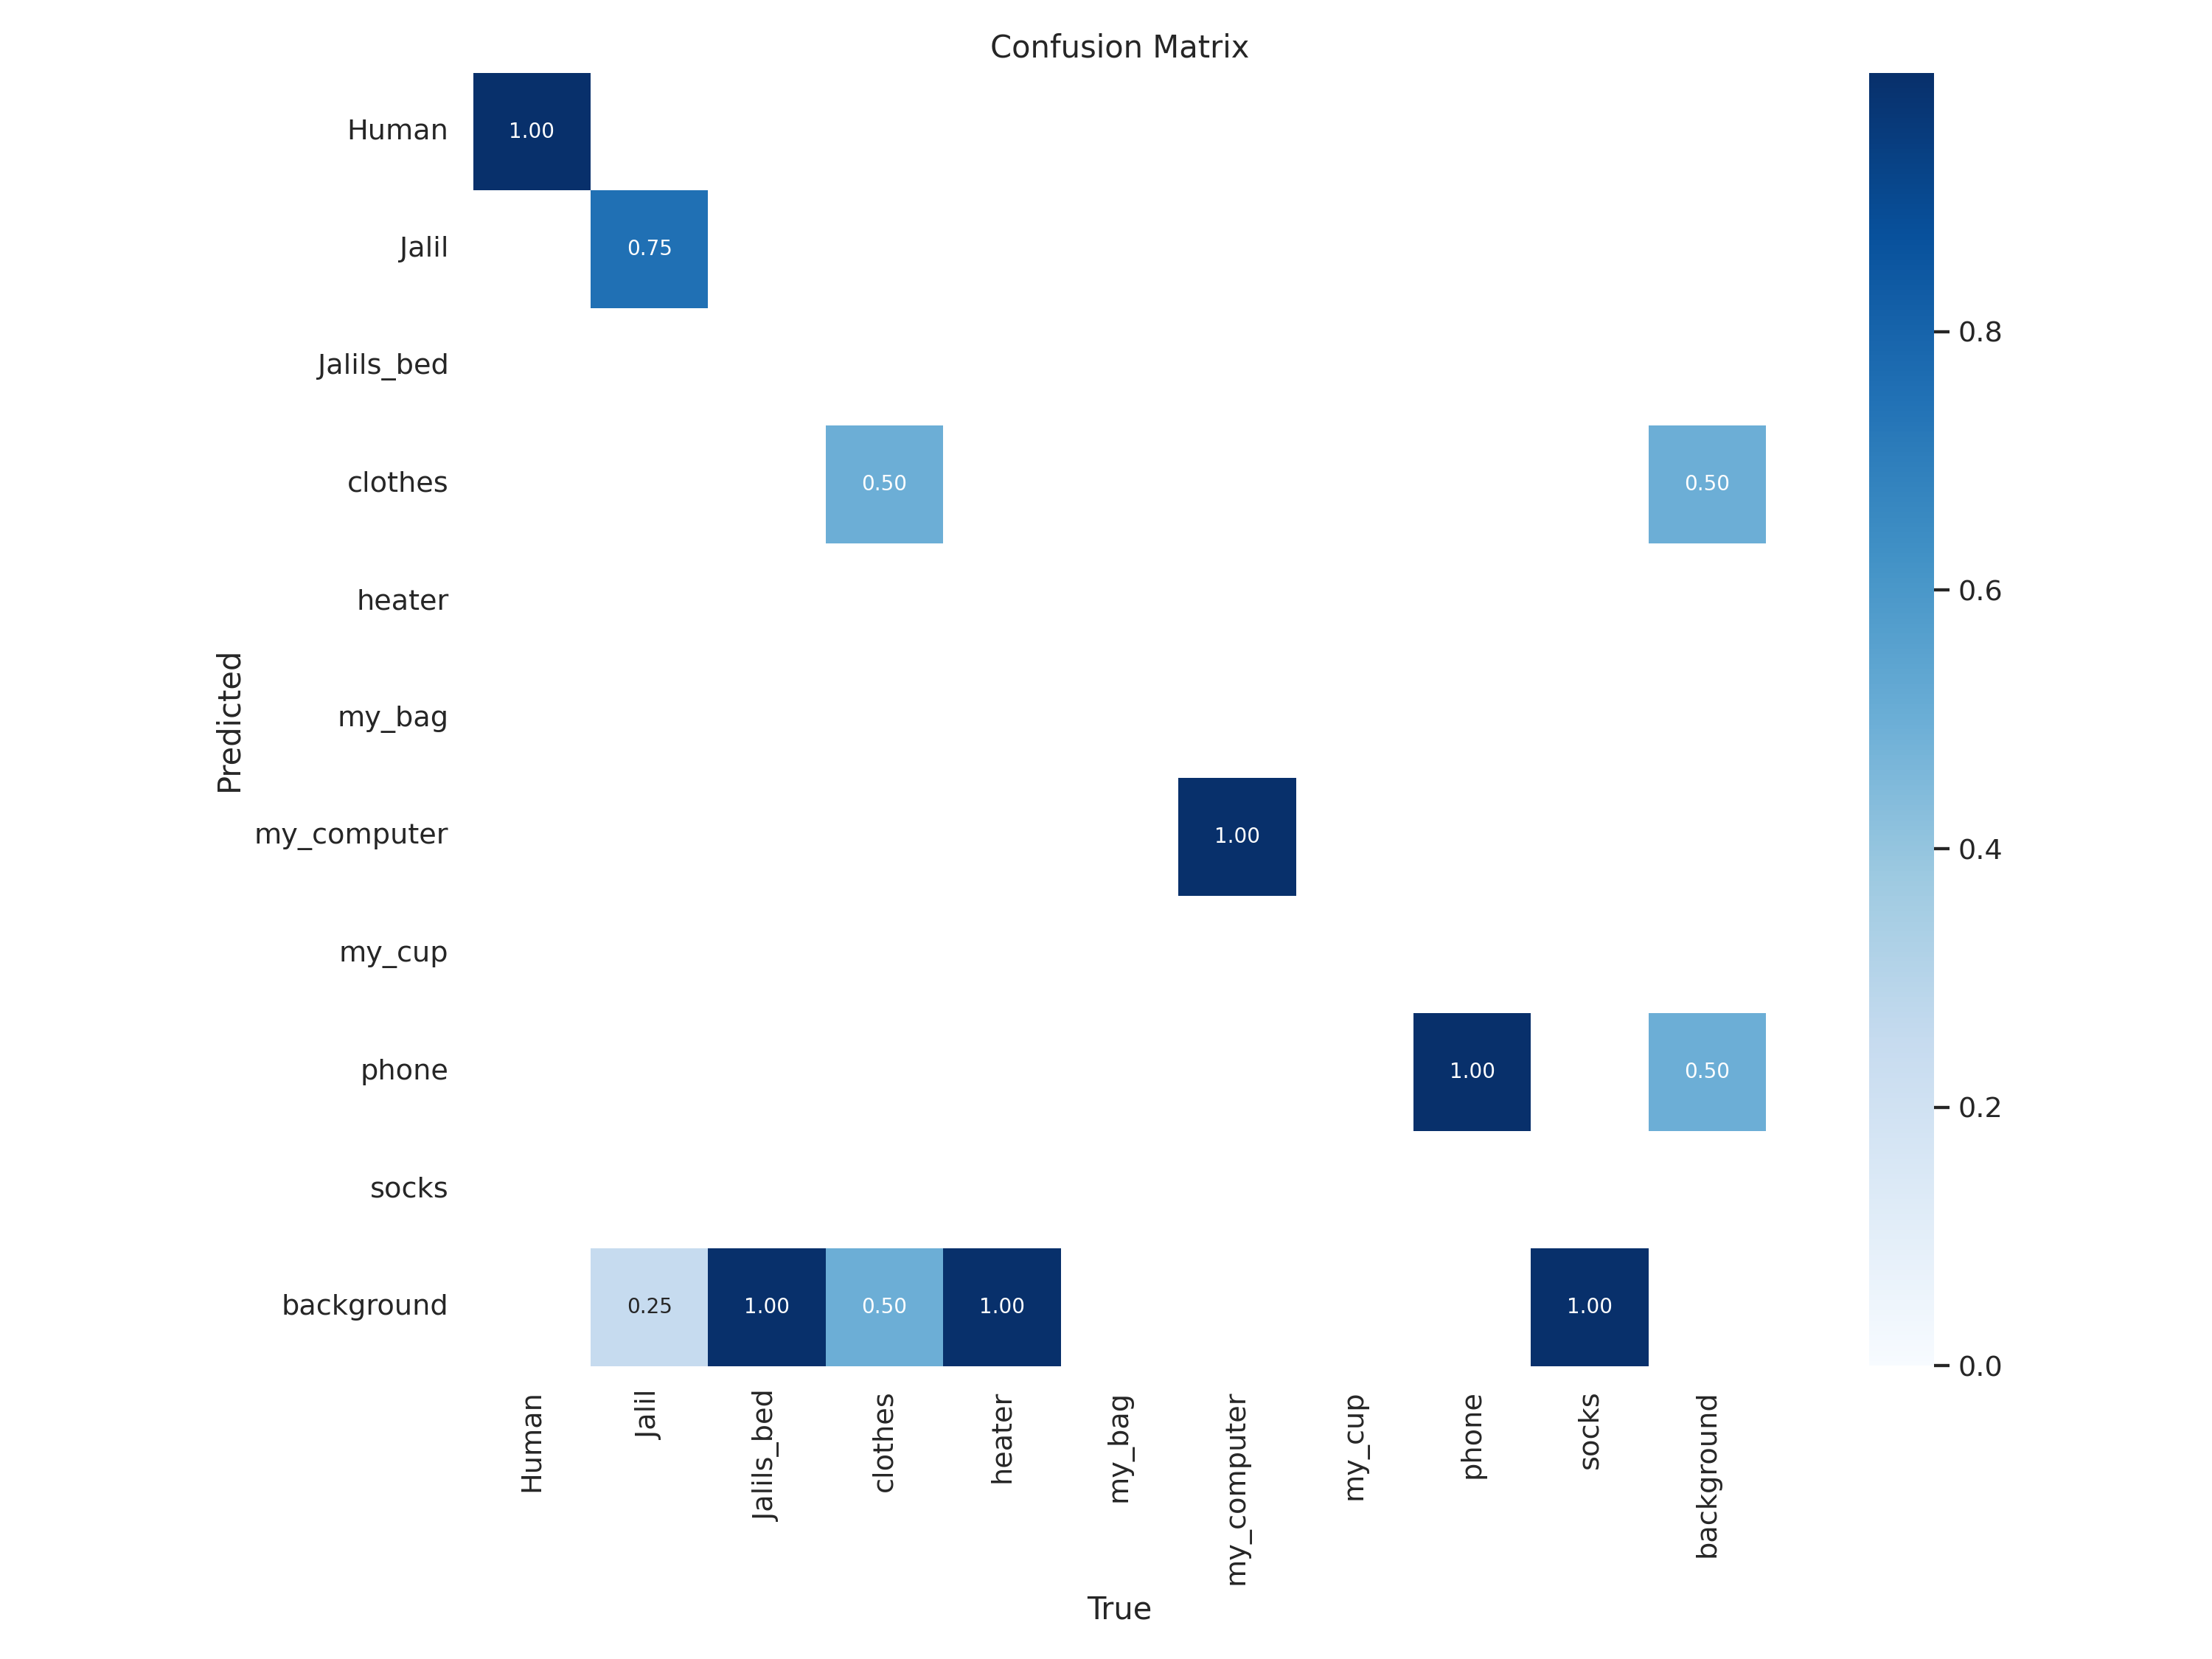

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

/content/catch_me_if_you_can-2


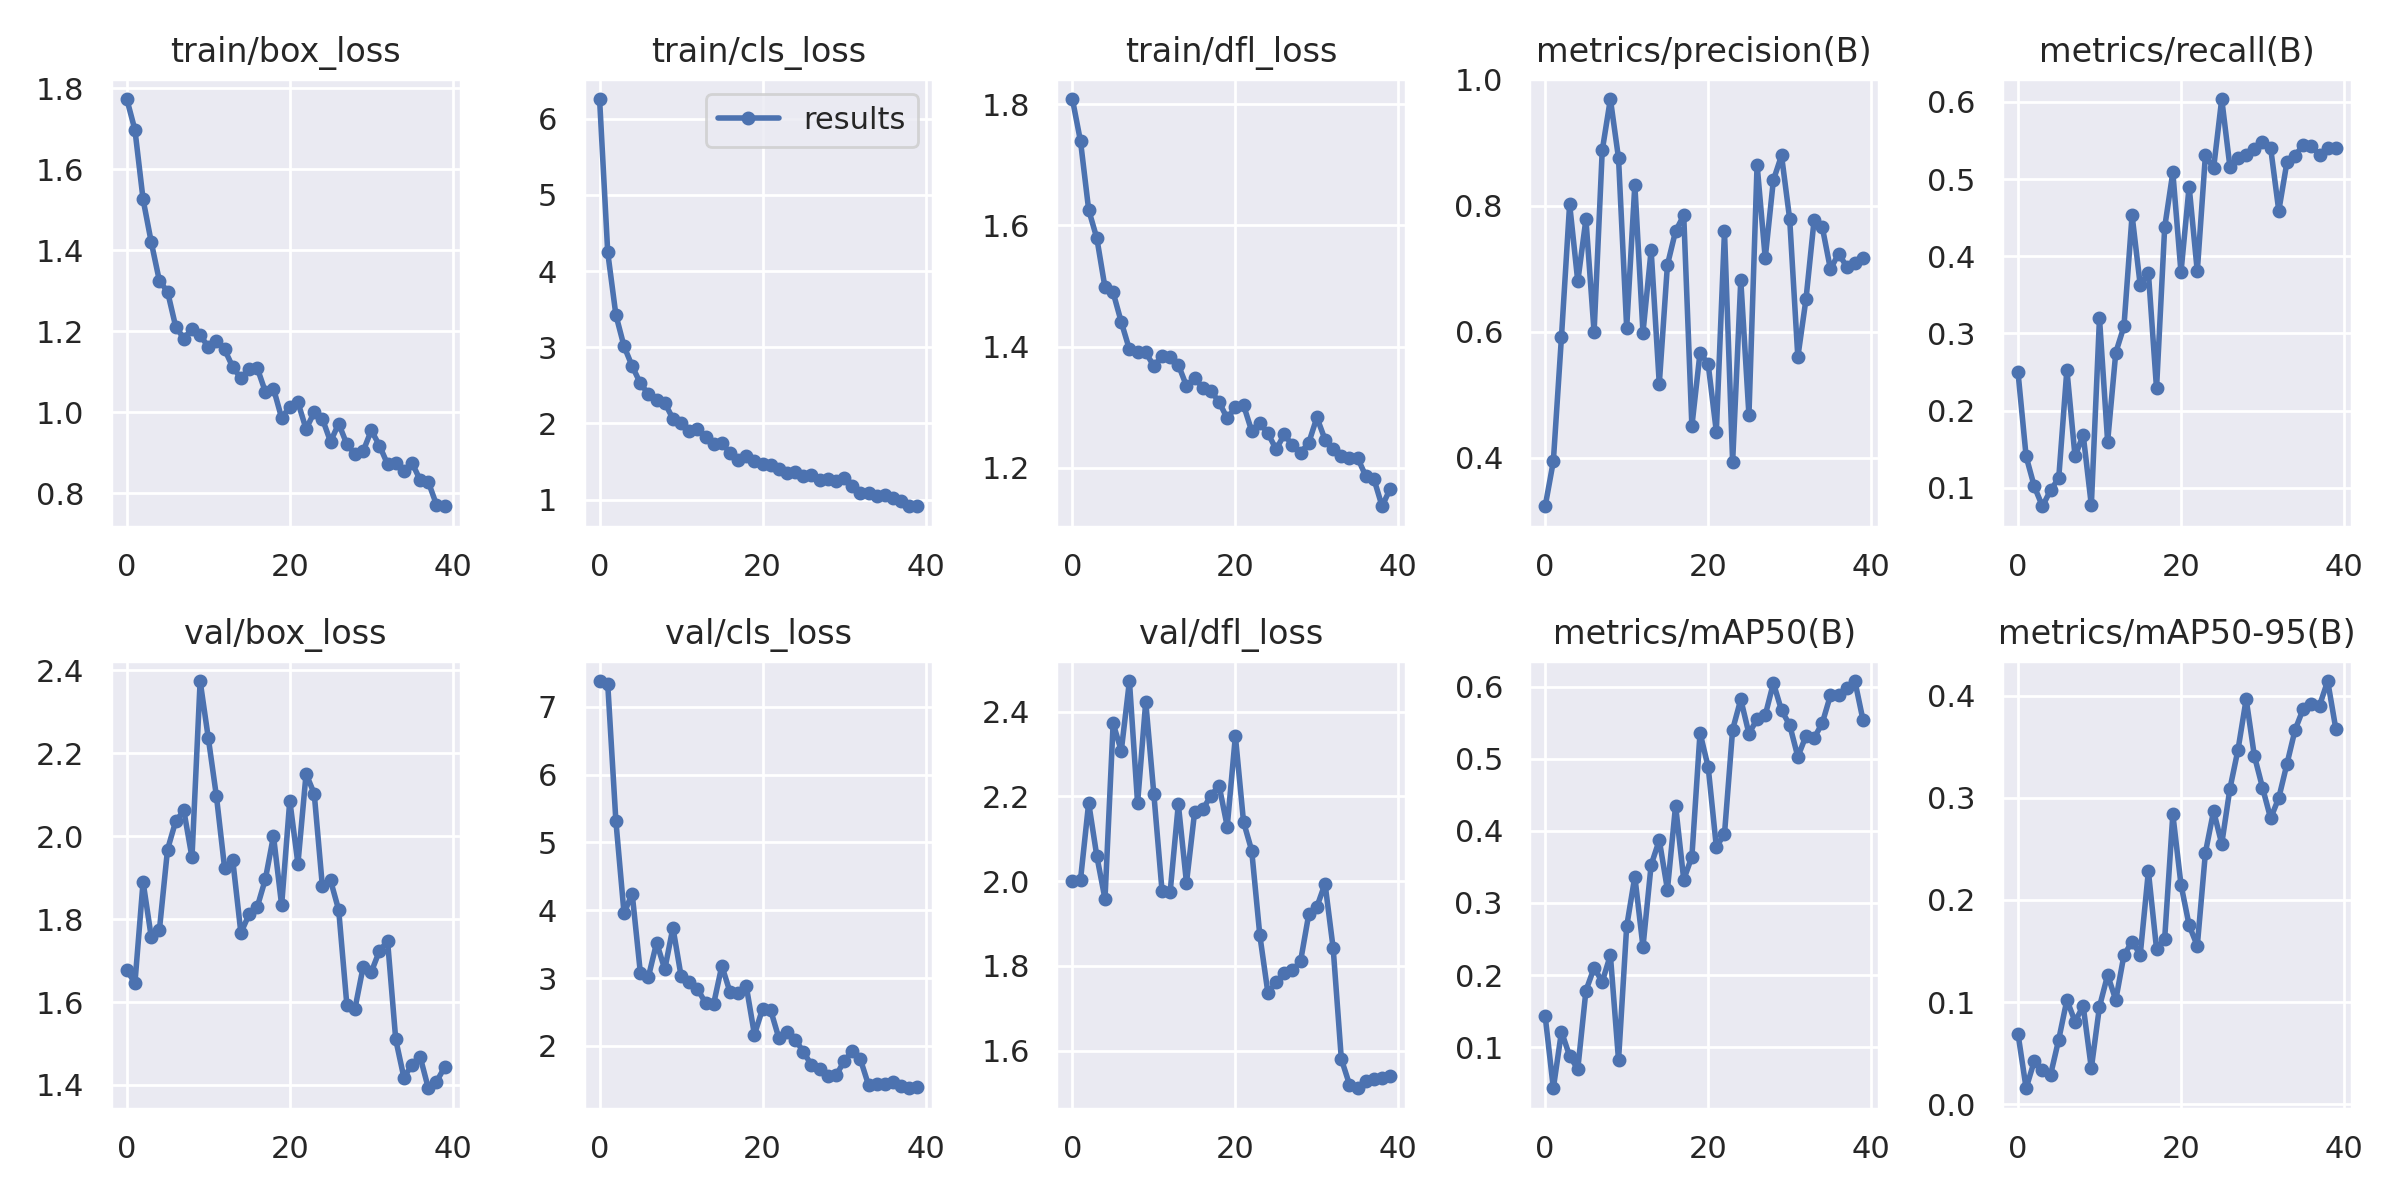

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

/content/catch_me_if_you_can-2


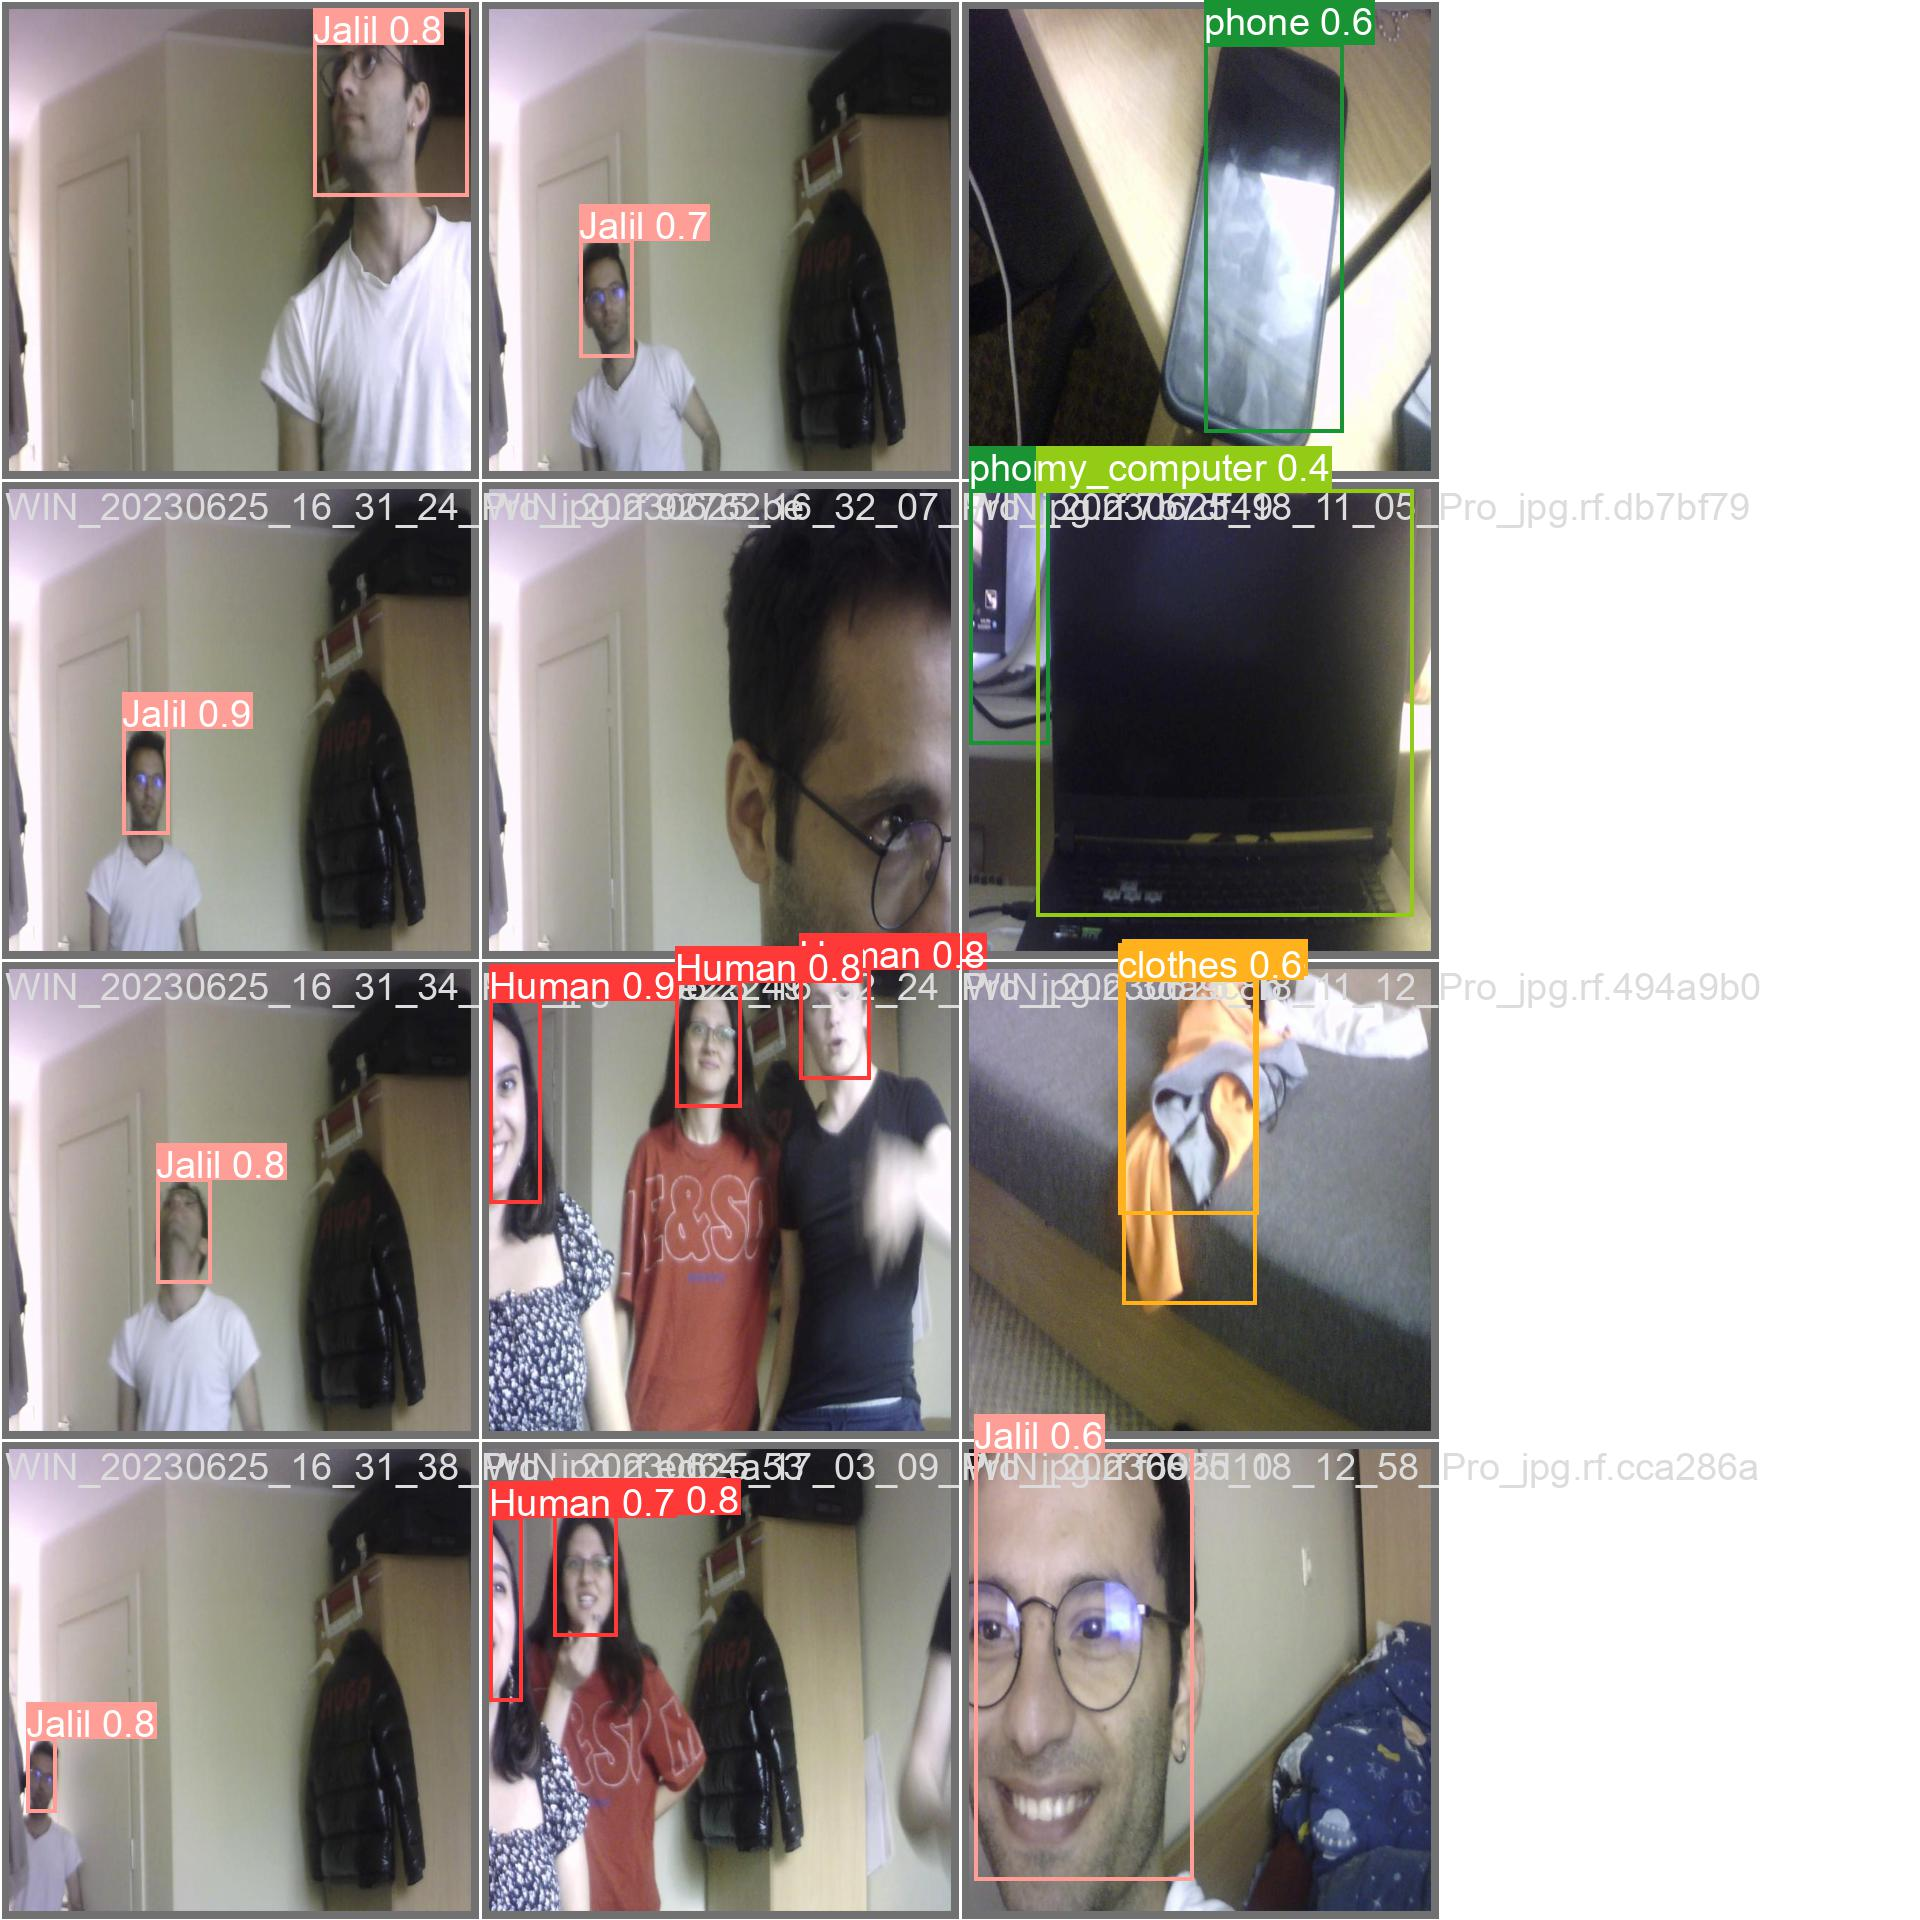

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data={dataset.location}/data.yaml

/content/catch_me_if_you_can-2
2023-06-25 16:06:18.371906: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/catch_me_if_you_can-2/datasets/catch_me_if_you_can-3/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.33it/s]
                   all         12         20      0.709      0.541      0.608      0.414
                 Human         12          5      0.885          1      0.995      0.467
                 Jalil         12          8          1      0.826      0.876      0.599
            Jalils_bed         12          1          1          0      0.497      0.448
               clothes         12 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train4/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/catch_me_if_you_can-2
2023-06-25 16:07:00.014168: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129454 parameters, 0 gradients, 28.5 GFLOPs
image 1/13 /content/catch_me_if_you_can-2/datasets/catch_me_if_you_can-3/test/images/WIN_20230625_16_31_26_Pro_jpg.rf.3a9e864dc4446ee32516f2601425e803.jpg: 800x800 1 Jalil, 25.4ms
image 2/13 /content/catch_me_if_you_can-2/datasets/catch_me_if_you_can-3/test/images/WIN_20230625_16_31_31_Pro_jpg.rf.575b859030a6c7d825550de1e03685d5.jpg: 800x800 1 Jalil, 24.7ms
image 3/13 /content/catch_me_if_you_can-2/datasets/catch_me_if_you_can-3/test/images/WIN_20230625_16_31_46_Pro_jpg.rf.32f69fbcb3cb5168740e91dba872d8ae.jpg: 800x800 1 Jalil, 24.7ms
image 4/13 /content/catch_me_if_you_can-2/datasets/catch_me_if_you_can-3/test/images/WIN_20230625_16_32_01_Pro_jpg.rf.3fbf35ce3ca33d82a28

**NOTE:** Let's take a look at few results.

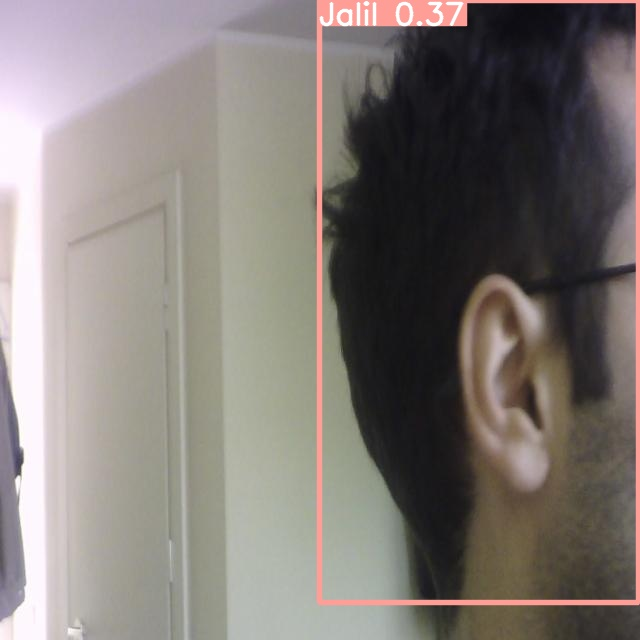

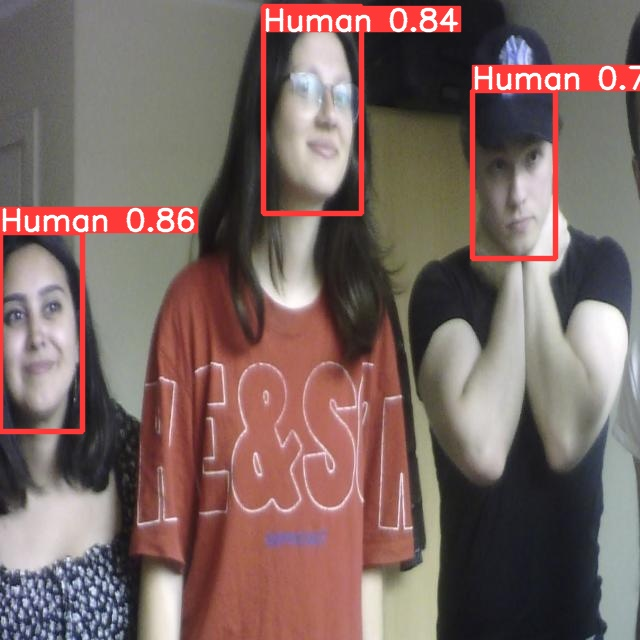

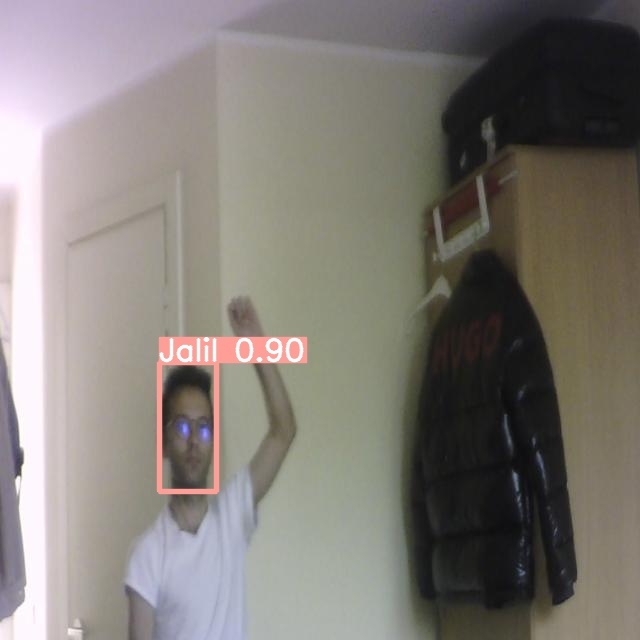

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict4/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
#deploy model to roboflow
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train4/")

An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
